In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

/home/user1/miniconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/user1/miniconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/user1/miniconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [10]:
K = 2

In [26]:
X = scipy.io.loadmat('data/Q2.mat')['X']

In [15]:
# number of vectors in X
N, d = X.shape

# construct indicator matrix (each entry corresponds to the cluster of each point in X)
I = np.zeros((N, 1))

# construct centers matrix
C = np.zeros((K, d))

# the list to record error
Loss = []


In [16]:
C = X[np.random.choice(N, K, replace=False)]
Sigmas = [np.eye(d)]*K
weights = (1/K) * np.ones(K)

In [46]:
#initializing multivariate normal objects:
rv = []

for k in range(K):
    rv.append(multivariate_normal(mean=C[k],  cov=Sigmas[k]))

#----------E-step---------

#calculating responsiblities
lk = np.vstack([weights[k]*rv[k].pdf(X) for k in range(K)])
res = lk/lk.sum(axis=0)

#calculating log likelihood:
ll = (np.log(lk)*res).sum()
print(ll)

#obtaining predictions
I = res.argmax(axis=0)

#recording old values of parameters in order to calculate differences for tolerances
C_old = C.copy()
Sigmas_old = Sigmas

#----------M-step----------

#updating weights
weights = res.mean(axis=1)

#updating means
C = np.vstack([(r*X.T).sum(axis = 1)/r.sum() for r in res])

#updating covariance

for k in range(K):
    outers = np.dstack([np.outer(x - C[k], x - C[k]) for x in X])
    Sigmas[k] = ((res[0].T * outers)/res[0].sum()).sum(axis = 2)
    
diff = abs(C - C_old).sum() + np.sum(abs(Sigmas[i] - Sigmas_old[i]).sum() for i in range(K))



-5702.532026292432


/home/user1/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:38: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


In [1]:
import importlib as imp

In [2]:
import main

In [16]:
imp.reload(main)

<module 'main' from '/home/user1/Documents/Grad_school/hw/CSE-6740/hw2/HW2_start_code/code/prob2/main.py'>

In [7]:
run main

2
2.4028843270113516
2.5141021062637834
1.2208817787682822
0.5552664451183499
0.28301780138440774
0.17933850062859955
0.1313521616049712
0.10402541351814784
0.08575657926154528
0.07213511293268857
0.061290960832477315
0.05234329809991861
0.04482205167493175
0.038439279603003695
0.03299548012987252
0.028339633397270192
0.024351076369814095
0.020930466399224468
0.01799468489471684
0.015473570493373556
0.013307593306642718
0.01144607778973089
0.00984578647887624
0.008469764176414152
0.007286381728578983
0.006268538231096521
0.00539299154870021
0.004639794032833711
0.003991815196278614
0.00343433671533816
0.0029547079040162516
0.002542051977323545
0.00218701514307007
0.0018815519381065182
0.0016187413326767541
0.0013926290244082318
0.0011980920755807478
0.001030722648700022
0.0008867280922567611
0.0007628450419710497
0.000656265548398427
0.0005645735324397716
0.00048569011571703014
0.00041782658086036983
0.000359443893738709
0.00030921787061832795
0.0002660092023285543
0.000228837658009850

In [4]:
Losses

plt.plot(Losses[0]);plt.show()

plt.scatter(X[:, 0], X[:, 1])

x_centre = X.mean(axis=0)

distances = ((X - x_centre)**2).sum(axis = 1)

max_rad = np.sqrt(distances.max())

[[-17176.157634097453,
  -5823.1463097491305,
  -5731.074138673125,
  -5726.609445346546,
  -5725.195829687851,
  -5723.821260346273,
  -5722.706245435391,
  -5721.8000781197725,
  -5721.009253757066,
  -5720.277484584324,
  -5719.580350682323,
  -5718.909956089674,
  -5718.26517953574,
  -5717.647004744261,
  -5717.056620110447,
  -5716.494784628076,
  -5715.961710721858,
  -5715.45713092515,
  -5714.980411599425,
  -5714.530662639865,
  -5714.106827599245,
  -5713.707752405989,
  -5713.332235521417,
  -5712.979063430529,
  -5712.647035086248,
  -5712.334978267421,
  -5712.0417601284225,
  -5711.766293634344,
  -5711.507541115488,
  -5711.264515827427,
  -5711.036282147299,
  -5710.821954852094,
  -5710.620697792397,
  -5710.431722181063,
  -5710.254284649893,
  -5710.087685180646,
  -5709.931264983834,
  -5709.78440437561,
  -5709.646520686918,
  -5709.517066227598,
  -5709.395526320166,
  -5709.281417412341,
  -5709.174285273377,
  -5709.073703276561,
  -5708.97927076816,
  -5708.89

In [100]:
for iter in range(1000):
    x1 = x_centre[0] + max_rad*(2*(np.random.rand(1)[0] - 0.5))
    x2 = x_centre[1] + np.random.choice([1, -1], 1)*np.sqrt(max_rad**2 - (x1 - x_centre[0])**2)
    plt.scatter(x1, x2, c="red")

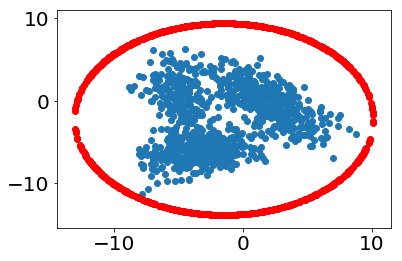

In [101]:
plt.show()

In [7]:
for i in Losses:
    plt.plot(i)

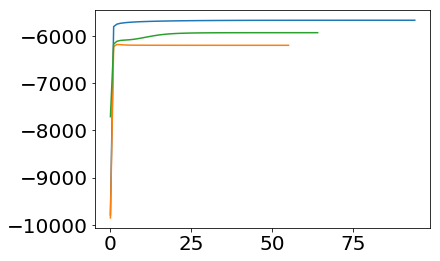

In [8]:
plt.show()